# Pillow, Tessaract, OpenCV

pillow - image manipulation, 

Tesseract, which is an optical character recognition library. So how we take pictures of books and take the texts out of them and turn into something we can process. Cracking, which is a layout library for tax, and you'll get a sense for the challenges that come when dealing with taking images and trying to recognize characters in them.

Open CV, or CV stands for Computer Vision. It's used for a lot of things, but we're going to focus on using it to detect faces and pictures, and your project will be about that.

## The Python Imaging Library (PIL) OR Pillow
Is the main library we use in python for dealing with image files. This library is not included with python - it's what's known as a third party library.

In [ ]:
import PIL
PIL.__version__

In [ ]:
help(PIL)

the file, called __init__.py, has the source code for the module itself

Python also has a function called dir() which will list the contents of an object. 

In [ ]:
dir(PIL)

In [ ]:
#lets import the image object from the PIL library, get help on it
from PIL import Image
#help(Image)

Running help() on Image tells us that this object is "the Image class wrapper". We see from the top level documentation about the image object that there is "hardly ever any reason to call the Image constructor directly", and they suggest that the open function might be the way to go.

In [ ]:
# A function called open()
# Remember that since we want to pass in the
# function reference, and not run the function itself, we don't put paretheses.
help(Image.open)

In [ ]:
# It looks like Image.open() is a function that loads an image from a file and returns an instance 
# of the Image class.

file="msi_recruitment.gif"
image=Image.open(file)
print(image)

In [ ]:
# Ok, we see that this returns us a kind of PIL.GifImagePlugin.GifImageFile. At first this might
# seem a bit confusing, since because we were told by the docs that we should be exepcting a
# PIL.Image.Image object back. But this is just object inheritance working! 

# In fact, the object
# returned is both an Image and a GifImageFile. We can use the python inspect module to see this
# as the getmro function will return a list of all of the classes that are being inherited by a
# given object. Lets try it.

import inspect
print("The type of the image is " + str(type(image)))
inspect.getmro(type(image))

In [ ]:
# to view the image object 
# image object has a show function. You can find this using the dir() function.
image.show()

In [ ]:
# That didn't seem to have the intended effect. The problem is that the image is stored
# remotely, on Coursera's server, but show tries to show it locally to you.  
# (actually in our case, the picture did open in the photos app)
# Instead, we want to render the image in the Jupyter notebook. It turns out Jupyter has a function
# which can help with this.
from IPython.display import display
display(image)

The Jupyter environment is running a special wrapper around the Python interpretor, called IPython. IPython allows the kernel back end to communicate with a browser front end. The IPython package has a display function which can take objects and use custom formatters in order to render them. A number of formatters are provided by default, including one which knows how to handle image types.

In [ ]:
import PIL
from PIL import Image
# And lets import the display functionality
from IPython.display import display   #now we can directly use display(image) to pop it up on the jupyter notebook
file="msi_recruitment.gif"
image=Image.open(file)

In [ ]:
# copy
help(image.copy)
#copy takes no arguments, and that the return object is an Image object itself.

In [ ]:
# save
help(image.save)
# The save method has a couple of parameters ,The first, called fp, is the filename
# we want to save the object to. The second, format, is interesting, it allows us to change the type of
# the image, but the docs tell us that this should be done automatically by looking at the file extension
# as well.

In [ ]:
# The second, format, is interesting, it allows us to change the type of
# the image, but the docs tell us that this should be done automatically by looking at the file extension
# as well. Lets give it a try -- this file was originally a GifImageFile, but if we save it with a
# .png format and read it in again we'll get a different kind of file
image.save("msi_recruitment.png")
image=Image.open("msi_recruitment.png")
import inspect
inspect.getmro(type(image))

In [ ]:
# Indeed, this created a new file, which we could view by going to the home folder
# now that you can explore how a library works using the functions of help(), dir() and getmro().
#
# filter()
# The filter() function takes a Filter object (e.g BLUR), and those are all stored in the ImageFilter object.
# Lets take a look.
from PIL import ImageFilter
help(ImageFilter)

In [ ]:
# Lets try and apply the BLUR filter. Before we do this
# we have to convert the image to RGB mode. We can convert the image using the convert() function.

image=image.convert('RGB') # this stands for red, green blue mode
blurred_image=image.filter(PIL.ImageFilter.BLUR)
display(blurred_image)

In [ ]:
contour_image = image.filter(PIL.ImageFilter.CONTOUR)
display(contour_image)

In [ ]:
# crop() removes portions of the image
# except for the bounding box you describe. 
 
print("{}x{}".format(image.width, image.height))

In [ ]:
# If we take a look at the crop documentation we see that the first parameter to the function is a tuple which is the 
# left, upper, right, and lower values of the X/Y coordinates
help(image.crop)

In [ ]:
# With PIL images, we define the bounding box using the upper left corner (0,0) and the lower right corner (maxW, maxH).
# which is not as same as in mathematics

# So, if we wanted to get the Michigan logo out of this image

display(image.crop((45,0,190,145)))

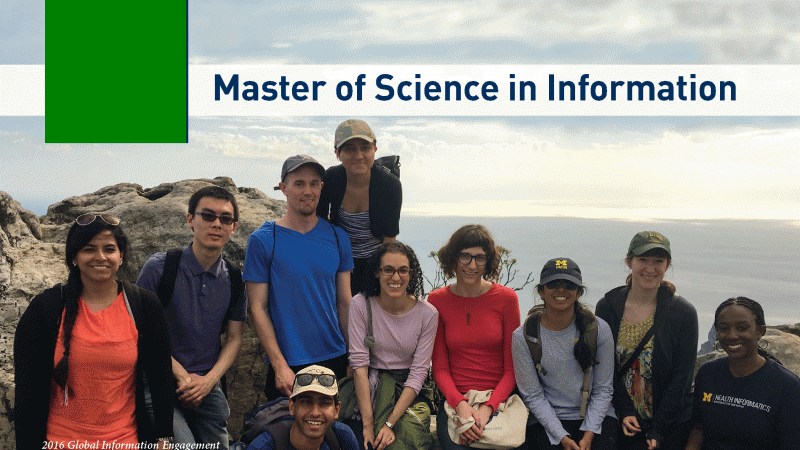

In [9]:
# crop(), like other functions, only returns a copy of the image, and doesn't change the image itself.

#to draw on a image (a quick guide)

from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((45,0,185,142), fill = 'green', outline ='green')
display(image)


#running this again and again, can show you how it changes the image object, rather than creating a copy

summary

help(), dir() and inspect.getmro()

copy()
save()
Imagefilter()
crop()
ImageDraw()

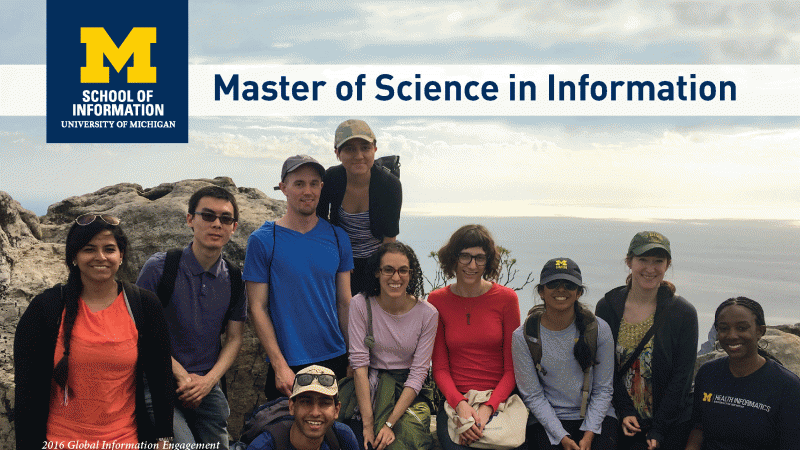

In [3]:
# First, lets import all of the library functions we need
import PIL
from PIL import Image
from IPython.display import display

# And lets load the image and convert it to RGB inline
file="msi_recruitment.gif"
image=Image.open(file).convert('RGB')

display(image)

In [4]:
# A task that is fairly common in image and picture manipulation is to create contact sheets of images.
# A contact sheet is one image that actually contains several other different images. lets change
# the brightness of the image in ten different ways.
#
# First up, lets import the ImageEnhance module, which has a nice object called Brightness
from PIL import ImageEnhance

# Checking the online documentation for this function, it takes a value between 0.0 (a completely black
# image) and 1.0 (the original image) to adjust the brightness.

# All of the classes in the ImageEnhance module do this the same way, you create an object, 
# in this case Brightness, then you call the enhance function() on that object with an appropriate parameter.
#
# Lets write a little loop to generate ten images of different brightness. First we need the Brightness
# object with our image
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(0, 10):
    # we actually call the brightness routine by calling the enhance() function.
    images.append(enhancer.enhance(i/10))
# We can see the result here is a list of ten PIL.Image.Image objects. Jupyter nicely prints out the value
# of python objects nested in lists
print(images)

[<PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB1C8>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB448>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB4C8>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB548>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB5C8>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB688>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB708>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB788>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB808>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9DDB648>]


In [5]:
# Lets take these images now and composite them, one above another, in a contact sheet.
# There are several different approaches we can use, but a simply - create a new image which is like
# the first image, but ten times as high. Lets check out the PIL.Image.new functionality
help(PIL.Image.new)


Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



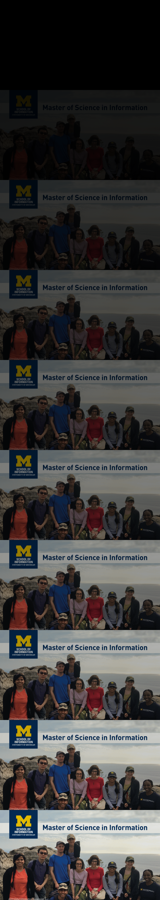

In [6]:
# The new function requires that we pass it a mode. We'll use the mode 'RGB' which is the mode of our current first image.
# For the size we have a tuple, which is the width of the image and the height. This will make a sort of "canvas" for
# our contact sheet. Finally, the color is optional, and we'll just leave it at black.
first_image=images[0]  #clear why we're doing this (as a refrence to mode, width, height)
from PIL import Image
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

# So now we have a black image that's ten times the size of the other images in the contact_sheet variable. 

# Now lets just loop through the image list and paste() the results in. The paste() function
# will be called on the contact_sheet object, and takes in a new image to paste, as well as an (x,y)
# offset for that image. In our case, the x position is always 0, but the y location will change by
# 450 pixels each time we iterate through the loop.
#

current_location = 0
for img in images:
    contact_sheet.paste(img, (0, current_location) )
    current_location += 450

# This contact sheet is 4,500 pixels tall 
#Lets just resize this sheet for display. ( resize() ) This function just takes a tuple of width and height.
contact_sheet = contact_sheet.resize((160,900) )
# Now lets just display that composite image
display(contact_sheet)

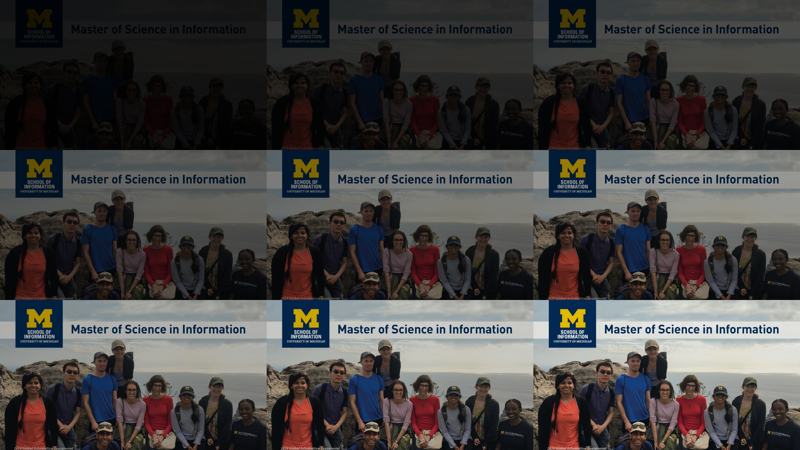

In [8]:
# now let make a nine image square

contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
# Lets use one variable for the X dimension, and one for the Y dimension.
x=0
y=0

# Now, lets iterate over our images. Except, we don't want to both with the first one, because it is
# just solid black.
for img in images[1:]:
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y += first_image.height
    else:
        x += first_image.width

# Now lets resize the contact sheet. We'll just make it half the size by dividing it by two. And, because
# the resize function needs to take round numbers, we need to convert our divisions from floating point
# numbers (which are always the result of division of two integers) into integers.
contact_sheet = contact_sheet.resize((int(contact_sheet.width/3),int(contact_sheet.height/3) ))

display(contact_sheet)

Well, that's been a tour of our first external API, the Python Imaging Library, or pillow module. In this series of lectures you've learned how to read and write images, manipulat them with pillow, and explore the functionality of third party APIs using features of Python like dir(), help(), and getmro(). You've also been introduced to the console, and how python stores these libraries on the computer. While for this course all of the libraries are included for you in the Coursera system, and you won't need to install your own, it's good to get a the idea of how this work in case you wanted to set this up on your own.

Finally, while you can explore PILLOW from within python, most good modules also put their documentation up online, and you can read more about PILLOW here: https://pillow.readthedocs.io/en/latest/

In [23]:
import PIL
from PIL import Image
image=Image.open("msi_recruitment.gif").convert('RGB')

intensity= [0.1, 0.5, 0.9]
R=list(range(9))
G=list(range(9))
B=list(range(9))
images=[]
for i in range(9):
    R[i], G[i], B[i] =image.split()
    if i==0:
        x=0.1
        y=1
        z=1
    if i==1:
        x=0.5
        y=1
        z=1 
    if i==2:
        x=0.9
        y=1
        z=1
    if i==3:
        x=1
        y=0.1
        z=1
    if i==4:
        y=0.5
        x=1
        z=1
    if i==5:
        y=0.9
        x=1
        z=1
    if i==6:
        x=1
        y=1
        z=0.1
    if i==7:
        x=1
        y=1
        z=0.5
    if i==8:
        x=1
        y=1
        z=0.9
    R[i] = R[i].point(lambda i: i * x )
    G[i] = G[i].point(lambda i: i * y )
    B[i] = B[i].point(lambda i: i * z )
    images.append(Image.merge('RGB', (R[i], G[i], B[i])))
images

[<PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E02C88>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E22748>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E225C8>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E22588>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E23E08>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E0E408>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E0E688>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E0E308>,
 <PIL.Image.Image image mode=RGB size=800x450 at 0x1D8B9E0E248>]

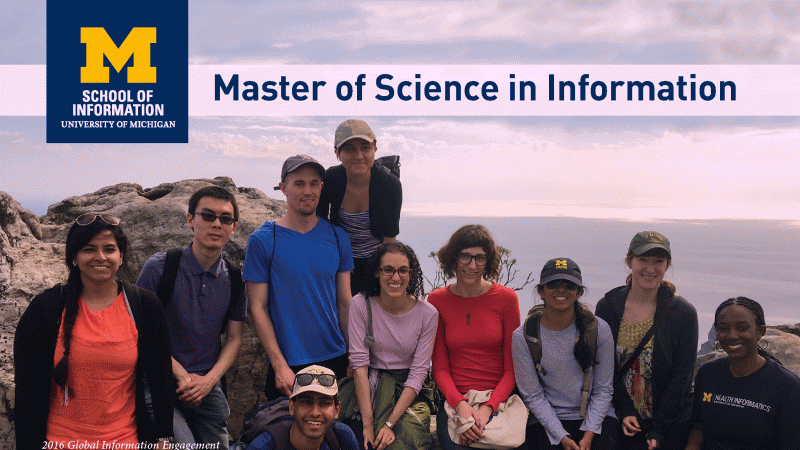

In [28]:
display(images[5])